# corr_pair_scatter

In [1]:
# http://qiita.com/ksomemo/items/69ae8eec98b795781586(load datasets in python)

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
# cm邪魔なので削除
columns = map(lambda c: c.replace(" (cm)", ""), iris.feature_names[:4])
iris_data = pd.DataFrame(iris.data, columns=columns)
iris_data["target"] = pd.Series(iris.target)
iris_data["target_names"] = iris_data["target"].apply(lambda x: iris.target_names[x])
iris_data.tail()

sepal length  sepal width  petal length  petal width  target target_names
145           6.7          3.0           5.2          2.3       2    virginica
146           6.3          2.5           5.0          1.9       2    virginica
147           6.5          3.0           5.2          2.0       2    virginica
148           6.2          3.4           5.4          2.3       2    virginica
149           5.9          3.0           5.1          1.8       2    virginica

In [7]:
iris_data_feature = iris_data[iris_data.columns[:4]]
iris_data_feature.tail()

sepal length  sepal width  petal length  petal width
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

In [20]:
iris_data.groupby("target_names").describe()

petal length  petal width  sepal length  sepal width  \
target_names                                                               
setosa       count     50.000000    50.000000     50.000000    50.000000   
             mean       1.464000     0.244000      5.006000     3.418000   
             std        0.173511     0.107210      0.352490     0.381024   
             min        1.000000     0.100000      4.300000     2.300000   
             25%        1.400000     0.200000      4.800000     3.125000   
             50%        1.500000     0.200000      5.000000     3.400000   
             75%        1.575000     0.300000      5.200000     3.675000   
             max        1.900000     0.600000      5.800000     4.400000   
versicolor   count     50.000000    50.000000     50.000000    50.000000   
             mean       4.260000     1.326000      5.936000     2.770000   
             std        0.469911     0.197753      0.516171     0.313798   
             min        3.000000     1.000000      4.900000     2.000000   
             25%        4.000000     1.200000      5.600000     2.525000   
             50%        4.350000     1.300000      5.900000     2.800000   
             75%        4.600000     1.500000      6.300000     3.000000   
             max        5.100000     1.800000      7.000000     3.400000   
virginica    count     50.000000    50.000000     50.000000    50.000000   
             mean       5.552000     2.026000      6.588000     2.974000   
             std        0.551895     0.274650      0.635880     0.322497   
             min        4.500000     1.400000      4.900000     2.200000   
             25%        5.100000     1.800000      6.225000     2.800000   
             50%        5.550000     2.000000      6.500000     3.000000   
             75%        5.875000     2.300000      6.900000     3.175000   
             max        6.900000     2.500000      7.900000     3.800000   

                    target  
target_names                
setosa       count      50  
             mean        0  
             std         0  
             min         0  
             25%         0  
             50%         0  
             75%         0  
             max         0  
versicolor   count      50  
             mean        1  
             std         0  
             min         1  
             25%         1  
             50%         1  
             75%         1  
             max         1  
virginica    count      50  
             mean        2  
             std         0  
             min         2  
             25%         2  
             50%         2  
             75%         2  
             max         2

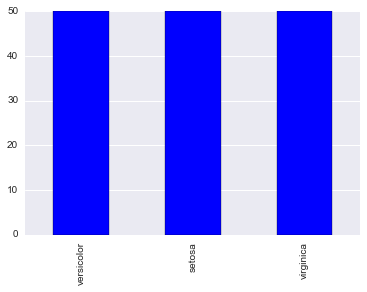

In [8]:
iris_data.target_names.value_counts().plot.bar()

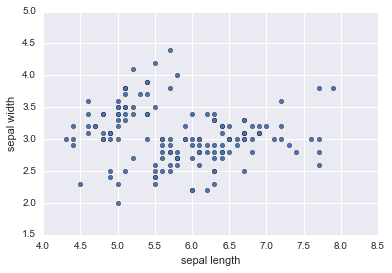

In [9]:
iris_data_feature.plot.scatter(x="sepal length", y="sepal width")

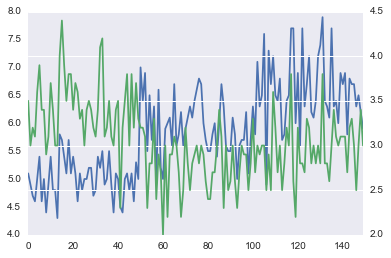

In [10]:
iris_data_feature["sepal length"].plot.line()
iris_data_feature["sepal width"].plot.line(secondary_y=True)


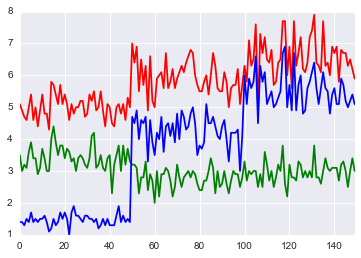

In [11]:
with pd.plot_params.use('x_compat', True):
    iris_data_feature["sepal length"].plot(color='r')
    iris_data_feature["sepal width"].plot(color='g')
    iris_data_feature["petal length"].plot(color='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1195c12e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c542cf8>]], dtype=object)

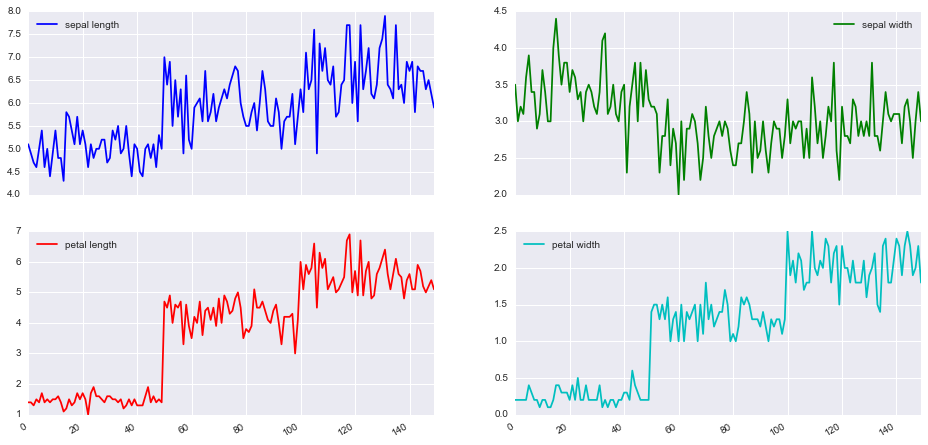

In [12]:
iris_data_feature.plot(subplots=True, figsize=(16, 8), layout=(2, 2))

In [13]:
iris_data_feature.corr()

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000

In [14]:
iris_data_feature.corr(method="kendall")

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.072112      0.717624     0.654960
sepal width      -0.072112     1.000000     -0.182391    -0.146988
petal length      0.717624    -0.182391      1.000000     0.803014
petal width       0.654960    -0.146988      0.803014     1.000000

In [15]:
iris_data_feature.corr(method="spearman")

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.159457      0.881386     0.834421
sepal width      -0.159457     1.000000     -0.303421    -0.277511
petal length      0.881386    -0.303421      1.000000     0.936003
petal width       0.834421    -0.277511      0.936003     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11caccf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d988a20>]], dtype=object)

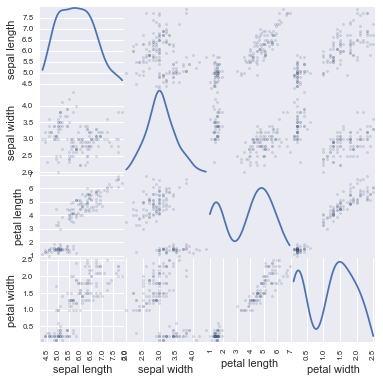

In [16]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(iris_data_feature, alpha=0.2, figsize=(6, 6), diagonal='kde')

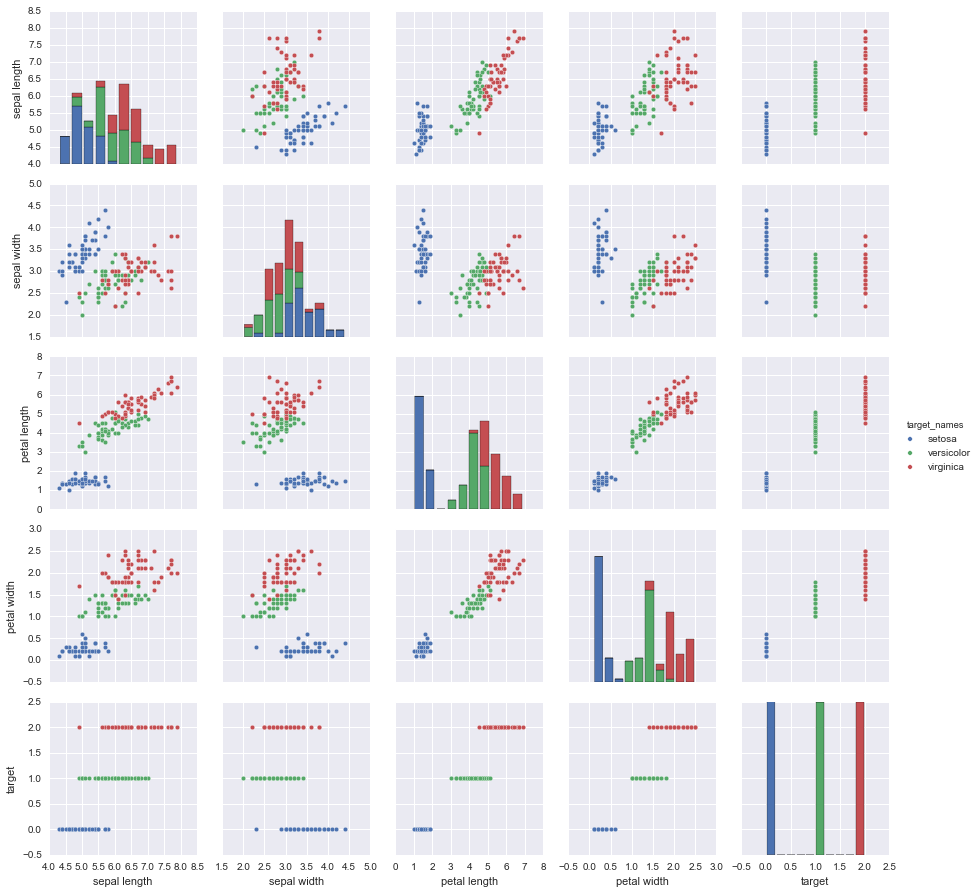

In [19]:
# sns.pairplot(iris_data, hue='target')
sns.pairplot(iris_data, hue='target_names')


In [18]:
price = pd.Series(np.random.randn(150).cumsum(), index=pd.date_range('2000-1-1', periods=150, freq='B'))